<a href="https://colab.research.google.com/github/Jay0310/Jay0310.github.io/blob/master/CNN_using_VGG16.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import pandas as pd
from pandas import Series,DataFrame
import matplotlib.pyplot as plt

In [0]:
from tensorflow import keras
from keras import backend as K
from keras.models import Sequential
from keras.layers import Dense,Dropout,Activation,Flatten,Conv2D,MaxPool2D
from keras.preprocessing.image import ImageDataGenerator,img_to_array,array_to_img
from keras.utils import np_utils
from keras.layers.embeddings import Embedding

Using TensorFlow backend.


In [0]:
from keras.datasets import cifar10
from keras.applications import VGG16

In [0]:
from keras.preprocessing.image import load_img

In [0]:
datagen=ImageDataGenerator(rotation_range=40,
                           width_shift_range=0.2,
                           zoom_range=0.2,
                           horizontal_flip=True,
                           height_shift_range=0.2,
                           fill_mode='nearest',
                           shear_range=0.2)

In [0]:
(x_train,y_train),(x_test,y_test)=cifar10.load_data()

In [0]:
(x_train.shape),(y_train.shape),(x_test.shape),(y_test.shape)

((50000, 32, 32, 3), (50000, 1), (10000, 32, 32, 3), (10000, 1))

In [0]:
y_train[0]

array([6], dtype=uint8)

In [0]:
y_train=np_utils.to_categorical(y_train,10)

In [0]:
y_train[0]

array([0., 0., 0., 0., 0., 0., 1., 0., 0., 0.], dtype=float32)

In [0]:
y_test=np_utils.to_categorical(y_test,10)

In [0]:
(y_test.shape),(y_train.shape)

((10000, 10), (50000, 10))

In [0]:
x_train=x_train.astype('float32')
x_test=x_test.astype('float32')

In [0]:
x_train=x_train/255

In [0]:
x_test=x_test/255

In [0]:
import cv2

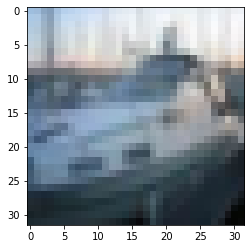

In [0]:
plt.imshow(x_test[2])

In [0]:
forzen=VGG16(weights='imagenet',input_shape=(32,32,3),include_top=False)

In [0]:
forzen.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 32, 32, 3)         0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 32, 32, 64)        1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 32, 32, 64)        36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 16, 16, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 16, 16, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 16, 16, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 8, 8, 128)         0     

In [0]:
model_train=forzen.output
model_train
model_train=Flatten()(model_train)
model_train=Dense(128,activation='relu')(model_train)
model_train=Dense(32,activation='relu')(model_train)
model_train=Dense(10,activation='softmax')(model_train)

In [0]:
from keras.models import Model

In [0]:
model1=Model(inputs=forzen.input,outputs=model_train)

In [0]:
model1.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 32, 32, 3)         0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 32, 32, 64)        1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 32, 32, 64)        36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 16, 16, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 16, 16, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 16, 16, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 8, 8, 128)         0   

In [0]:
model1.layers

In [0]:
for layer in model1.layers[:-4]:
  layer.model_train=False

In [0]:
model1.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])



Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [0]:
history=model1.fit(x_train,y_train,epochs=15,batch_size=200,validation_data=(x_test,y_test))



Train on 50000 samples, validate on 10000 samples
Epoch 1/15
50000/50000 [==============================] - 20s 394us/step - loss: 0.2742 - acc: 0.9014 - val_loss: 0.2545 - val_acc: 0.9042
Epoch 2/15
50000/50000 [==============================] - 14s 287us/step - loss: 0.2024 - acc: 0.9216 - val_loss: 0.1685 - val_acc: 0.9364
Epoch 3/15
50000/50000 [==============================] - 14s 288us/step - loss: 0.1514 - acc: 0.9415 - val_loss: 0.1471 - val_acc: 0.9448
Epoch 4/15
50000/50000 [==============================] - 14s 287us/step - loss: 0.1238 - acc: 0.9530 - val_loss: 0.1344 - val_acc: 0.9505
Epoch 5/15
50000/50000 [==============================] - 14s 287us/step - loss: 0.1020 - acc: 0.9618 - val_loss: 0.1186 - val_acc: 0.9564
Epoch 6/15
50000/50000 [==============================] - 14s 289us/step - loss: 0.0877 - acc: 0.9676 - val_loss: 0.1143 - val_acc: 0.9601
Epoch 7/15
50000/50000 [==============================] - 14s 288us/step - loss: 0.0757 - acc: 0.9719 - val_loss: 

In [0]:
score=model1.evaluate(x_test,y_test)

10000/10000 [==============================] - 2s 230us/step


In [0]:
score

[0.11808177062869071, 0.9642399988174438]

In [0]:
model1.save("vgg16.h5")